In [2]:
import pandas as pd
cj = pd.read_csv('bks_cjxx1.csv')
#cj为Dateframe结构，将学号提取出来之后转换为list类型
yuanshi_xuehao = cj['xh'].tolist()
yuanshi_xuehao =yuanshi_xuehao[0:100000]
#通过set消去重复元素
xuehao = set(yuanshi_xuehao)        
xuehao = list(xuehao)#30000
l_chang=len(yuanshi_xuehao)#1000000
l_duan=len(xuehao)#30000
import numpy as np

#print(index_1)
chengji = cj['kccj']#成绩
chengji = chengji[0:100000]

kecheng = cj['kch']#上的课程
kecheng = kecheng[0:100000]
xn = cj['xn']#学年
xn=xn[0:100000]
xqm = cj['xqm']#学期码
xqm=xqm[0:100000]

list_chengji=list(chengji)
list_kecheng=list(kecheng)

All_X_chengji_one=[]
All_X_chengji_two=[]
All_X_chengji_three=[]
All_y_chengji_four=[]

count = 0
for i in range(len(xuehao)):
    #对于每轮循环，student_grade,都将被重新赋值。
    student_grade = xuehao[i-1]
    xueqi=[]
    student_grade_chengji=[]
    ruxue_nianfen = int(student_grade/100000)
    #把这个学号的所有成绩索引出来：index2为一个列表，但对于一个列表不可以直接索引另外一个列表
    index_1 = [x for x in range(l_chang) if yuanshi_xuehao[x] == student_grade]
    student_grade_one=[]
    student_grade_two=[]
    student_grade_three=[]
    student_grade_four=[]
    for j in index_1:
        kecheng_xn = xn[j]
        kecheng_xn = int(kecheng_xn[0:4])
        kecheng_xqm = int(xqm[i])
        kecheng_xueqi =(kecheng_xn-ruxue_nianfen)*2+kecheng_xqm
        xueqi.append(kecheng_xueqi)
    a=max(xueqi)
    if a>4:
        for k in index_1:
            kecheng_xn = xn[k]
            kecheng_xn = int(kecheng_xn[:4])
            kecheng_xqm = int(xqm[k])
            kecheng_xueqi =(kecheng_xn-ruxue_nianfen)*2+kecheng_xqm
            if kecheng_xueqi == 1:
                student_grade_one.append(list_chengji[k]) 
            if kecheng_xueqi == 2:
                student_grade_two.append(list_chengji[k]) 
            if kecheng_xueqi == 3:
                student_grade_three.append(list_chengji[k])
            if kecheng_xueqi == 4:
                student_grade_four.append(list_chengji[k])
        if len(student_grade_four)*len(student_grade_three)*len(student_grade_two)*len(student_grade_one)==0:
            continue
        grade_one_mean = sum(student_grade_one)/len(student_grade_one)
        grade_two_mean = sum(student_grade_two)/len(student_grade_two)
        grade_three_mean = sum(student_grade_three)/len(student_grade_three)
        grade_four_mean = sum(student_grade_four)/len(student_grade_four)
        All_X_chengji_one.append(grade_three_mean)
        All_X_chengji_two.append(grade_three_mean)
        All_X_chengji_three.append(grade_three_mean)
        All_y_chengji_four.append(grade_four_mean)
        count=count+1

In [3]:
print(count)
print(All_X_chengji_one)
print(All_X_chengji_two)
print(All_X_chengji_three)
print(All_y_chengji_four)

1014
[14.5, 92.66666666666667, 80.0, 84.5, 84.5, 74.0, 16.5, 67.33333333333333, 65.8, 49.0, 73.33333333333333, 45.5, 94.0, 13.0, 79.0, 89.0, 62.0, 65.0, 78.0, 60.0, 0.0, 77.5, 87.33333333333333, 68.5, 84.0, 41.8, 81.0, 84.66666666666667, 69.5, 96.0, 66.33333333333333, 90.0, 76.5, 69.33333333333333, 72.5, 20.0, 74.0, 93.25, 95.0, 76.0, 46.5, 21.5, 63.5, 25.0, 66.0, 70.0, 78.0, 73.0, 72.8, 88.0, 82.0, 95.0, 84.5, 74.0, 0.0, 66.5, 68.66666666666667, 69.0, 59.25, 67.0, 95.0, 88.25, 76.66666666666667, 81.0, 93.0, 75.0, 73.0, 20.0, 79.33333333333333, 44.5, 74.5, 61.5, 61.857142857142854, 79.42857142857143, 89.0, 89.75, 19.0, 75.0, 86.0, 83.0, 93.5, 70.0, 73.0, 80.5, 60.0, 77.5, 84.0, 29.0, 38.25, 55.0, 84.5, 65.0, 81.0, 86.66666666666667, 65.0, 49.0, 74.33333333333333, 52.0, 78.25, 68.0, 62.5, 57.0, 77.0, 76.0, 63.5, 83.75, 51.333333333333336, 70.5, 68.5, 82.33333333333333, 49.75, 81.33333333333333, 84.25, 77.0, 85.0, 71.0, 81.5, 85.2, 75.33333333333333, 73.0, 83.5, 90.0, 76.0, 86.0, 38.0, 3

In [41]:
#对于第一个线性相关的数据处理
X=np.array(All_X_chengji_three)
y=np.array(All_y_chengji_four)

gama = 0.9
train_number = int(gama*count)
index_train = np.random.choice(count,train_number,replace=False)

X_train=[]
y_train=[]
for i in index_train:
    X_train.append([All_X_chengji_three[i]])
    y_train.append(All_y_chengji_four[i])
X_train=np.array(X_train)
y_train=np.array(y_train)

gama = 0.1
train_number = int(gama*count)
index_text = np.random.choice(count,train_number,replace=False)
X_text=[]
y_text=[]
for i in index_text:
    X_text.append([All_X_chengji_three[i]])
    if All_y_chengji_four[i]>=60:
        y_text.append([1])
    else:
        y_text.append([0])
X_text=np.array(X_text)
y_text=np.array(y_text)
l_text=len(X_text)

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

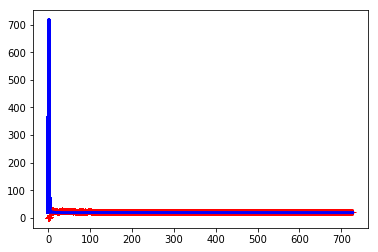

In [45]:
#线性回归部分
#闭式解算出来的线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#print(lin_reg.intercept_, lin_reg.coef_)

#多项式回归：：：
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X[0]#表示之前的特征集
X_poly[0]#表示二次特征集，下面将用二次特征集作为线性函数的输入去拟合
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

plot_learning_curves(lin_reg, X_train, y_train)
text_success=0
for i in range(l_text):
    a=0
    if lin_reg.predict([X_text[i-1]])>=60:
        a=1
    if a==y_text[i-1]:
        text_success=text_success+1
Accuracy = text_success/l_text

In [46]:
print(Accuracy)

0.7722772277227723


In [10]:
#对于第一个线性相关的数据处理
X=np.array(All_X_chengji_three)
y=np.array(All_y_chengji_four)

gama = 0.9
train_number = int(gama*count)
index_train = np.random.choice(count,train_number,replace=False)

X_train=[]
y_train=[]
for i in index_train:
    X_train.append([All_X_chengji_three[i],All_X_chengji_two[i],All_X_chengji_one[i]])
    y_train.append(All_y_chengji_four[i])
X_train=np.array(X_train)
y_train=np.array(y_train)


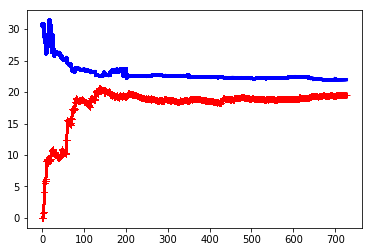

In [16]:
#决策树
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)
tree_reg.predict([[55, 65,79]])
plot_learning_curves(tree_reg, X_train, y_train)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


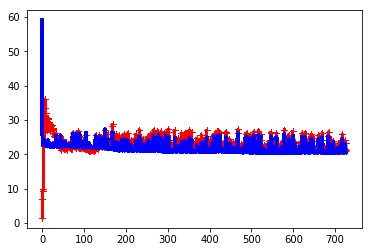

In [17]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)

svm_reg.fit(X_train, y_train)
svm_reg.predict([[84,84,78]])
plot_learning_curves(svm_reg, X_train, y_train)



In [27]:
X_train=[]
y_train=[]
for i in index_train:
    X_train.append([All_X_chengji_three[i],All_X_chengji_two[i],All_X_chengji_one[i]])
    if All_y_chengji_four[i]>60:
        y_train.append([1])
    else:
        y_train.append([0])

X_train=np.array(X_train)
y_train=np.array(y_train)

gama = 0.1
train_number = int(gama*count)
index_text = np.random.choice(count,train_number,replace=False)
X_text=[]
y_text=[]
for i in index_text:
    X_text.append([All_X_chengji_three[i],All_X_chengji_two[i],All_X_chengji_one[i]])
    if All_y_chengji_four[i]>60:
        y_text.append([1])
    else:
        y_text.append([0])
X_text=np.array(X_text)
y_text=np.array(y_text)
l_text=len(X_text)

In [32]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
        ))
polynomial_svm_clf.fit(X_train, y_train)
#polynomial_svm_clf.predict([[91,82,75]])
count_success=0
for i in range(l_text):
    if polynomial_svm_clf.predict([X_text[i-1]])==y_text[i-1]:
        count_success=count_success+1
Accuracy = count_success/l_text

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
print(Accuracy)

0.6237623762376238


In [34]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
count_success=0
for i in range(l_text):
    if rnd_clf.predict([X_text[i-1]])==y_text[i-1]:
        count_success=count_success+1
Accuracy = count_success/l_text

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
print(Accuracy)

0.7326732673267327


In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1
        )
bag_clf.fit(X_train, y_train)
#bag_clf.predict([[91,72,84]])
count_success=0
for i in range(l_text):
    if bag_clf.predict([X_text[i-1]])==y_text[i-1]:
        count_success=count_success+1
Accuracy = count_success/l_text

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print(Accuracy)

0.6831683168316832
